In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:,1:-1].values  #0th col similar to 1st col
Y = data.iloc[:, 2:3].values # need to pass 2-D array to fit_transform
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [2]:
from sklearn.preprocessing import StandardScaler
# it will transform data such that its distribution will have a mean value 0 and standard deviation of 1.
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn.svm import SVR
model = SVR(kernel='rbf') # rbf ( radial basis function) - Gaussian Kernel
model.fit(X,Y)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

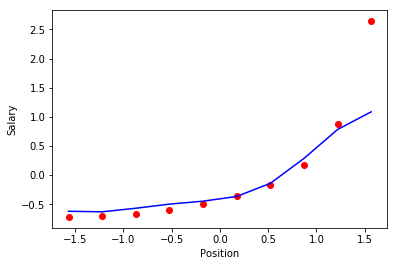

In [4]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, model.predict(X), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [5]:
Y_ = scaler_Y.inverse_transform(model.predict(scaler_X.transform(np.array([[6.5]])))) # inverse_transform to Normalize Salary from scaled form
Y_

array([170370.0204065])

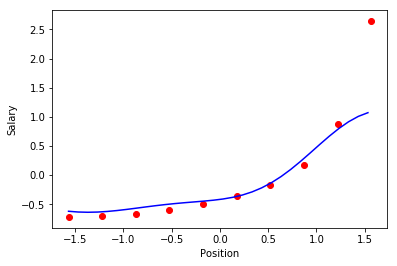

In [6]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show() 
